<a href="https://colab.research.google.com/github/Park-hanna/BDA_study/blob/main/Computer%20Vision/Mask_and_social_distancing_detection_using_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parkhannah833","key":"78bf44606c362ad274d8621ef9b609e9"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions list

ref                                                                                           deadline             category             reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection                          2023-06-14 23:59:00  Featured         $1,000,000        936           False  
https://www.kaggle.com/competitions/asl-fingerspelling                                        2023-08-10 23:59:00  Research           $200,000          0           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction                 2023-06-08 23:59:00  Research           $100,000        985           False  
https://www.kaggle.com/competitions/2023-kaggle-ai-report                                     2023-07-05 23:59:00  Analytics           $70,0

In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection

 99% 395M/398M [00:16<00:00, 27.3MB/s]
100% 398M/398M [00:16<00:00, 25.5MB/s]


In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

100% 329M/330M [00:14<00:00, 27.1MB/s]
100% 330M/330M [00:14<00:00, 24.3MB/s]


In [ ]:
!kaggle datasets download -d lalitharajesh/haarcascades

 69% 1.00M/1.45M [00:00<00:00, 1.46MB/s]
100% 1.45M/1.45M [00:00<00:00, 1.95MB/s]


In [ ]:
!unzip /content/face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
!unzip /content/face-mask-detection.zip

Archive:  /content/face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotation

In [ ]:
!unzip /content/haarcascades.zip

Archive:  /content/haarcascades.zip
  inflating: haarcascade_eye.xml     
  inflating: haarcascade_eye_tree_eyeglasses.xml  
  inflating: haarcascade_frontalcatface.xml  
  inflating: haarcascade_frontalcatface_extended.xml  
  inflating: haarcascade_frontalface_alt.xml  
  inflating: haarcascade_frontalface_alt2.xml  
  inflating: haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascade_frontalface_default.xml  
  inflating: haarcascade_fullbody.xml  
  inflating: haarcascade_lefteye_2splits.xml  
  inflating: haarcascade_licence_plate_rus_16stages.xml  
  inflating: haarcascade_lowerbody.xml  
  inflating: haarcascade_profileface.xml  
  inflating: haarcascade_righteye_2splits.xml  
  inflating: haarcascade_russian_plate_number.xml  
  inflating: haarcascade_smile.xml   
  inflating: haarcascade_upperbody.xml  


In [ ]:
import numpy as np
import pandas as pd
import cv2
from scipy.spatial import distance

<h3> Using haar cascade to detect faces<h3>

Object Detection using Haar feature-based cascade classifier is and effective object detection method proposed by Paul Viola and Michael Jones in thier paper, 'Rapid Object DEtection using a Boosted Cascade of Simple Features' in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. We'll be using a Haar Cascade Model trained to detect faces in oreder to obtain the bounding box coordinates of faces in an image.

In [ ]:
# loading haarcascade_frontalface_defualt.xml
face_model = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

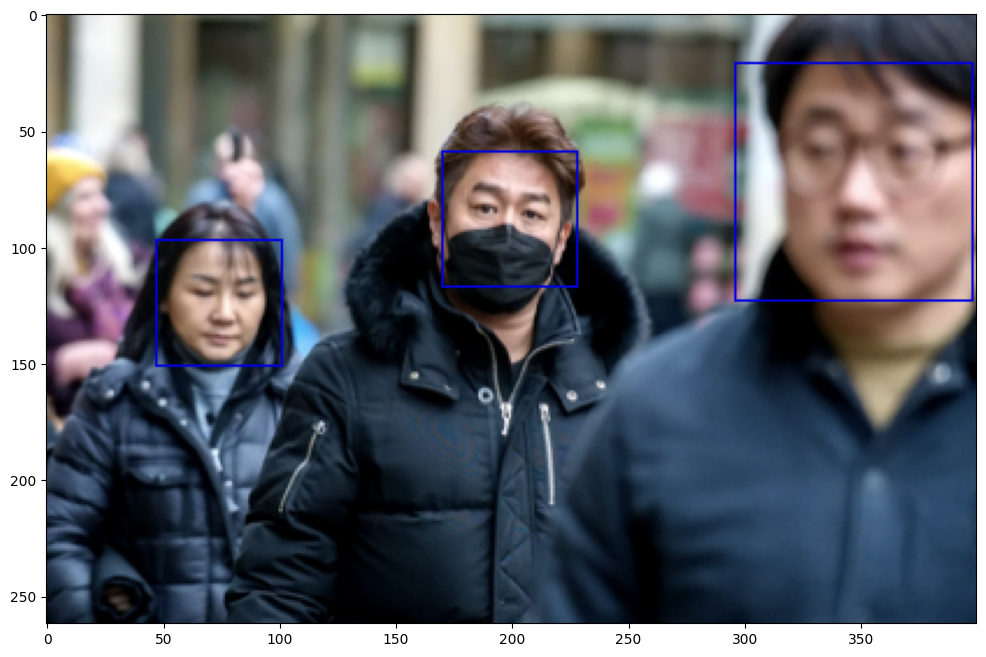

In [ ]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/images/maksssksksss244.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors = 4)
# returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#colored output image

for (x, y, w, h) in faces:
  cv2.rectangle(out_img,(x, y), (x+w, y+h), (0,0,225),1)
plt.figure(figsize = (12,12))
plt.imshow(out_img)

<h3>Detecting social distancing violations<h3>

This can be done by interating over the coordinates of faces and calculating the distance for each possible pair, if the distance for a particular pair is less than MIN_DISTANCE then the bounding boxes for those faces are colored red. MIN_DISTANCE must be manually intialized in such a way that it corresponds to the minimum allowable distance in real life

In [ ]:
MIN_DISTANCE = 130

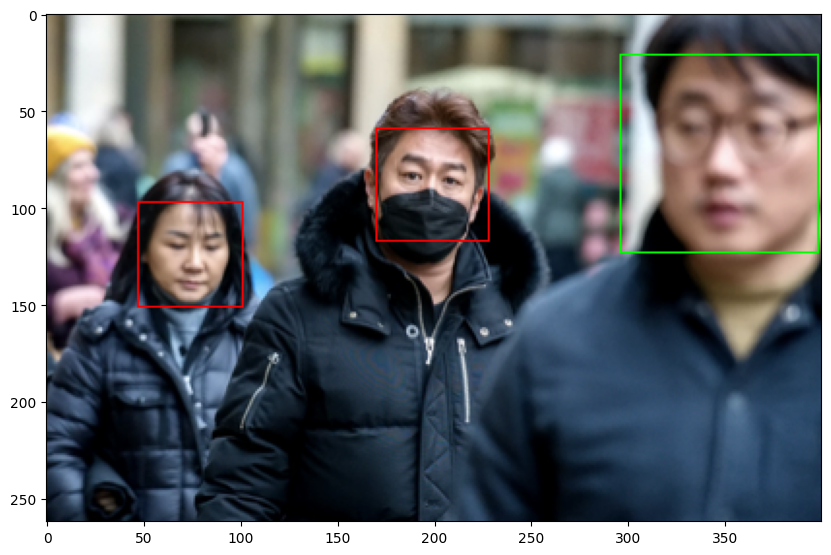

In [ ]:
if len(faces) >= 2:
  label = [0 for i in range(len(faces))]
  for i in range(len(faces) - 1):
    for j in range(i+1, len(faces)):
      dist = distance.euclidean(faces[i][:2], faces[j][:2])

      if dist < MIN_DISTANCE:
        label[i] = 1
        label[j] = 1

  new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # colored output image

  for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    if label[i] == 1:
      cv2.rectangle(new_img, (x,y), (x+w, y+h), (255,0,0),1)

    else:
      cv2.rectangle(new_img, (x,y), (x+w, y+h), (0,255,0),1)

  plt.figure(figsize = (10,10))
  plt.imshow(new_img)

else:
  print('No. of faces detected is less than 2')



**Red box shows violation of social distancing**

<h3> using VGG19 for mask detection

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#load train and test set
train_dir = '/content/Face Mask Dataset/Train'
test_dir = '/content/Face Mask Dataset/Test'
val_dir = '/content/Face Mask Dataset/Validation'

In [ ]:
# data augumentation

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

vla_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory = val_dir, target_size = (128, 128), class_mode = 'categorical', batch_size= 32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir, target_size = (128, 128), class_mode = 'categorical', batch_size= 32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


**Building VGGG 19 transfer learning model**

In [ ]:
vgg19 = VGG19(weights = 'imagenet', include_top = False, input_shape = (128,128,3))

for layer in vgg19.layers:
  layer.trainable = False

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.summary

80134624/80134624 [==============================] - 3s 0us/step


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f019f71dba0>>

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit_generator(generator=train_generator, steps_per_epoch = len(train_generator)//32,
                              epochs= 20, validation_data = val_generator,
                              validation_steps = len(val_generator)//32)

<ipython-input-22-2e1bde1203a6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, steps_per_epoch = len(train_generator)//32,


Epoch 1/20
9/9 [==============================] - 81s 9s/step - loss: 0.5596 - accuracy: 0.7014
Epoch 2/20
9/9 [==============================] - 75s 8s/step - loss: 0.2289 - accuracy: 0.9097
Epoch 3/20
9/9 [==============================] - 75s 8s/step - loss: 0.2055 - accuracy: 0.9236
Epoch 4/20
9/9 [==============================] - 72s 8s/step - loss: 0.1579 - accuracy: 0.9340
Epoch 5/20
9/9 [==============================] - 71s 8s/step - loss: 0.0889 - accuracy: 0.9826
Epoch 6/20
9/9 [==============================] - 74s 8s/step - loss: 0.0890 - accuracy: 0.9792
Epoch 7/20
9/9 [==============================] - 72s 8s/step - loss: 0.0826 - accuracy: 0.9896
Epoch 8/20
9/9 [==============================] - 71s 8s/step - loss: 0.0820 - accuracy: 0.9688
Epoch 9/20
9/9 [==============================] - 78s 9s/step - loss: 0.0730 - accuracy: 0.9792
Epoch 10/20
9/9 [==============================] - 71s 8s/step - loss: 0.0816 - accuracy: 0.9688
Epoch 11/20
9/9 [======================

In [ ]:
model.evaluate_generator(test_generator)

<ipython-input-23-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.07677891850471497, 0.9725000262260437]

our modela achieved 97% accuracy on test data.



**Testing the model on the test data**

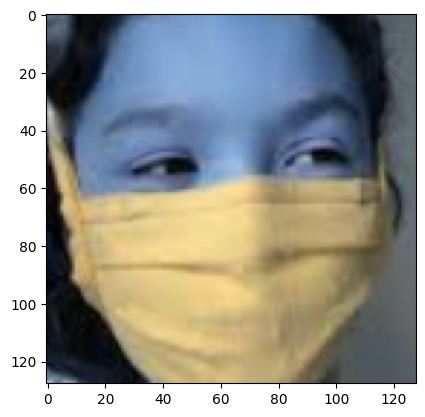

In [ ]:
sample_mask_img = cv2.imread('/content/Face Mask Dataset/Test/WithMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [ ]:
model.predict(sample_mask_img)

1/1 [==============================] - 1s 825ms/step


array([[0.9768264 , 0.03958504]], dtype=float32)

The model is able to classify if the person is wearing a mask or not

Save the model

In [ ]:
model.save('masknet.h5')

Integrating with haar cascade

we now take crops of the faces detected in the image and use the model trained in the above section to determine whether the individual faces hace a mask or not

In [ ]:
mask_label = {0:'MASK', 1:'NO MASK'}
dist_label = {0:(0,255,0), 1:(255,0,0)}

1/1 [==============================] - 0s 347ms/step


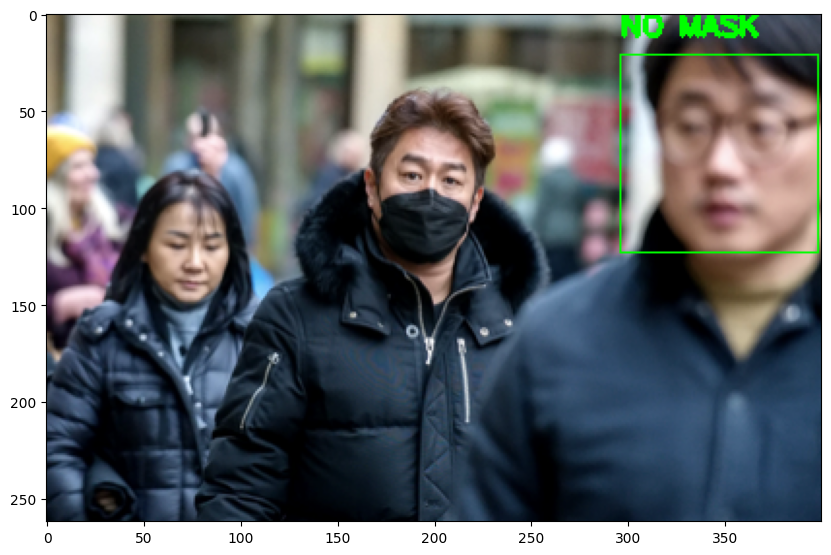

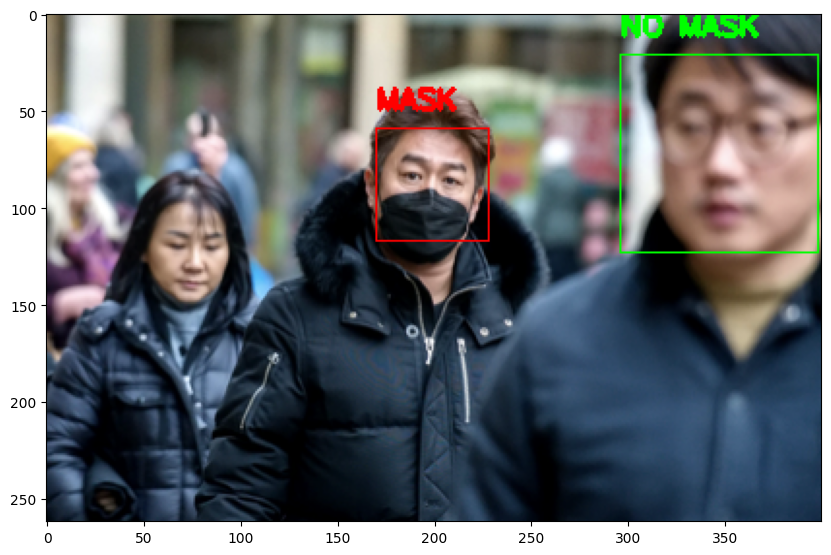

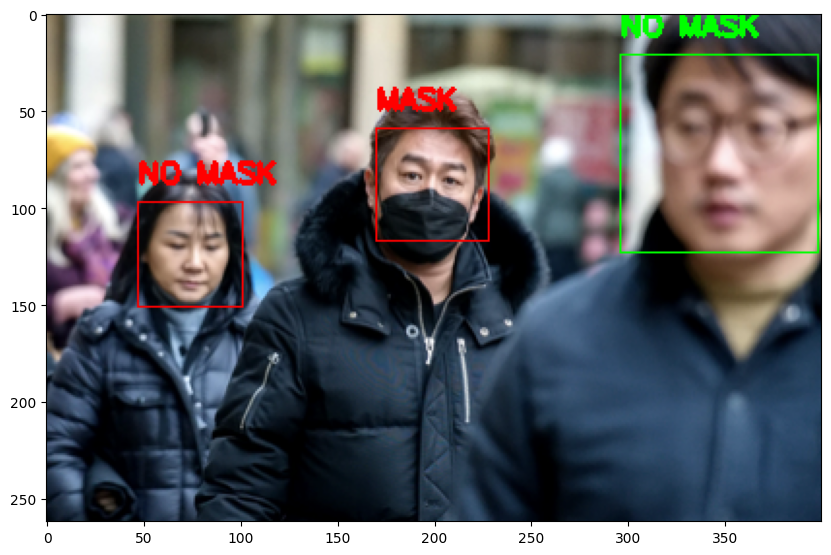

In [ ]:
if len(faces) >= 2:
  label = [0 for i in range(len(faces))]
  for i in range(len(faces)-1):
    for j in range(i+1, len(faces)):
      dist = distance.euclidean(faces[i][:2],faces[j][:2])
      if dist < MIN_DISTANCE:
        label[i] = 1
        label[j] = 1

  new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  for i in range(len(faces)):
    (x, y, w, h) = faces[i]
    crop = new_img[y:y+h, x:x+w]
    crop = cv2.resize(crop, (128, 128))
    crop = np.reshape(crop,[1, 128, 128, 3])/255.0
    mask_result = model.predict(crop)
    cv2.putText(new_img, mask_label[mask_result.argmax()],(x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, dist_label[label[i]],2)
    cv2.rectangle(new_img, (x,y), (x+w, y+h), dist_label[label[i]],1)
    plt.figure(figsize = (10,10))
    plt.imshow(new_img)

else:
  print('No. of faces detected is less than 2')